# Evaluate a Twitter-Account
The notebook analyses the downloaded Tweets.

In [1]:
# Import all necessary libraries
import json
import dateutil
import operator
import numpy as np
import pandas as pd
from nltk import ngrams
from nltk import bigrams
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
# Path to the stored tweets
path_tweets = 'build/'

# Name of the tweets-json
name_json = 'Tweets_Donald_Trump.json'
#name_json = 'Tweets_Hillary_Clinton.json'

name = name_json.split('.')[0].split('_', 1)[-1].replace('_', ' ')

In [3]:
# Variable to store the data
data = []

# Open the stored Tweets
with open(path_tweets+name_json) as f:
    # Iterate over every line
    for line in f:
        # Load the Tweet's json-data
        tweet = json.loads(line)
        
        # Parse the date and retrieve the data
        created_at = dateutil.parser.parse(tweet['created_at'])
        contributors = tweet['contributors']
        coordinates = tweet['coordinates']
        favorite_count = tweet['favorite_count']
        geo = tweet['geo']
        lang =tweet['lang']
        place = tweet['place']
        retweet_count = tweet['retweet_count']
        retweeted = tweet['retweeted']
        text = tweet['text']
        truncated = tweet['truncated']
        
        # Store the data of each Tweet
        data.append([created_at, contributors, coordinates, favorite_count, geo, lang, place, retweet_count, retweeted, text, truncated])

In [4]:
# Store the data in a DataFrame
df = pd.DataFrame(data, columns=['created_at', 'contributors', 'coordinates', 'favorite_count', 'geo', 'lang', 'place', 'retweet_count', 'retweeted', 'text', 'truncated'])
# Drop empty columns
df = df.dropna(axis=1, how='all')

In [5]:
# Examine the DataFrame's shape
print(df.shape)
print(list(df.columns))

(3236, 8)
['created_at', 'favorite_count', 'lang', 'place', 'retweet_count', 'retweeted', 'text', 'truncated']


In [6]:
# Use a nice plot style
plt.style.use('ggplot')

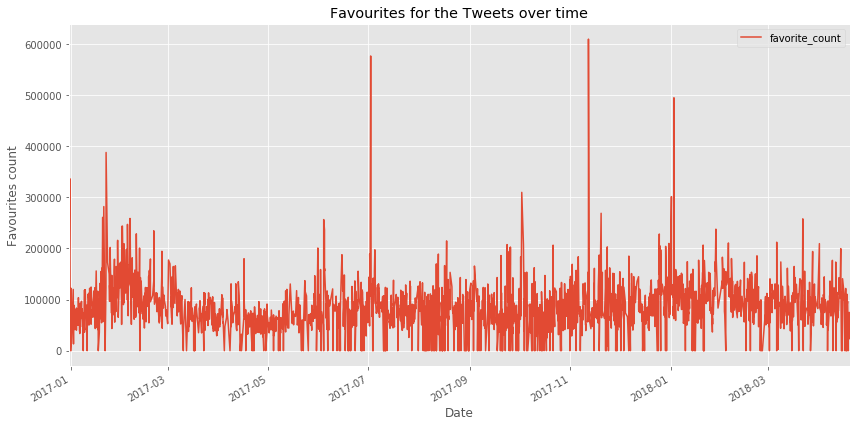

In [7]:
# Plot the account's activity and favourites
df.plot(x='created_at', y='favorite_count', figsize=(14,7))
plt.title('Favourites for the Tweets over time')
plt.xlabel('Date')
plt.ylabel('Favourites count')
plt.show()

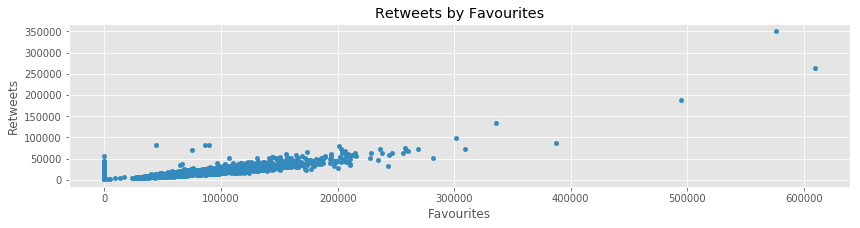

In [8]:
# Plot the relation between retweets and favourites
df.plot.scatter(x='favorite_count', y='retweet_count', figsize=(14,3))
plt.title('Retweets by Favourites')
plt.xlabel('Favourites')
plt.ylabel('Retweets')
plt.show()

In [9]:
# Examine the used languages 
for lang in df['lang'].value_counts().index.tolist():
    df_temp = df[df['lang']==lang]['text']
    for tweet in df_temp.head(1):
        print('{} {}: {}\n'.format(df_temp.shape[0], lang, tweet))

3176 en: James Comey Memos just out and show clearly that there was NO COLLUSION and NO OBSTRUCTION. Also, he leaked classif… https://t.co/YfMYBrTkza

52 und: RT @nikkihaley: https://t.co/oO3wIKolMy

3 ja: RT @AbeShinzo: フロリダに到着し、早速トランプ大統領との首脳会談に臨みました。今日は、大半を北朝鮮問題に費やし、非常に重要な点で認識を一致させることができました。
「日本のために最善となるようベストを尽くす」
トランプ大統領は、来る米朝首脳会談で拉致問題を取り上げ…

2 et: MERRY CHRISTMAS!!! https://t.co/mYtV5GNdLl

1 in: RT @foxandfriends: FOX NEWS ALERT: 2 US drone strikes in Somalia target Al Qaeda and Al-Shabaab https://t.co/MqrY7zbMy2

1 vi: It was an honor to welcome the Prime Minister of Vietnam, Nguyễn Xuân Phúc to the @WhiteHouse this afternoon. https://t.co/6YbrIvJUCY

1 de: BORDER WALL prototypes underway! https://t.co/arFNO80zmO



In [10]:
# Read the most popular tweets
for text in df[df['retweet_count']>100000][['text', 'retweet_count']].sort_values(by='retweet_count', ascending=False).values:
    print(text[1], '\n', text[0], '\n')

350413 
 #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg 

264025 
 Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so… https://t.co/PmsWNkH4r4 

188079 
 North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone fro… https://t.co/EvTgZxiji0 

133747 
 Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love! 



In [11]:
# Find the most used hashtags
hashtags = {}
# Iterate over each Tweet
for tweet in df['text'].values:
    # Iterate over each word
    for word in tweet.split(' '):
        # Check for hashtags
        if word.startswith('#'):
            # Remove punctuation
            word = word.replace(',', '').replace('.', '').lower()
            # Increase hashtag count
            if word in hashtags.keys():
                hashtags[word] += 1
            else:
                hashtags[word] = 1
            
# Sort word counts by their occurence
x = sorted(hashtags.items(), key=operator.itemgetter(1), reverse=True)
x[:20]

[('#maga', 29),
 ('#usa🇺🇸', 15),
 ('#fakenews', 14),
 ('#hurricaneharvey', 11),
 ('#maga🇺🇸', 9),
 ('#harvey', 8),
 ('#maga!', 7),
 ('#puertorico', 7),
 ('#obamacare', 6),
 ('#makeamericagreatagain', 5),
 ('#fake', 5),
 ('#icymi-', 5),
 ('#taxday', 4),
 ('#weeklyaddress🇺🇸', 4),
 ('#unga', 4),
 ('#americafirst🇺🇸', 4),
 ('#wef18', 3),
 ('#jfkfiles', 3),
 ('#taxreform', 3),
 ('#dobbs', 3)]

In [12]:
# Find the most used words
stop = stopwords.words('english')

words = {}
# Iterate over each Tweet
for tweet in df['text'].values:
    # Iterate over each word
    for word in tweet.split(' '):
        # Fix puncuation
        word = word.lower().replace(',', '').replace('.', '').replace('!', '')
        # Check for english- and customised stopwords
        if word not in stop and word not in ['-', '', 'rt', '&amp;']:
            # Increase word count
            if word in words.keys():
                words[word] += 1
            else:
                words[word] = 1
                
# Sort word counts by their occurence
x = sorted(words.items(), key=operator.itemgetter(1), reverse=True)
x[:20]

[('great', 558),
 ('people', 221),
 ('news', 219),
 ('us', 214),
 ('thank', 194),
 ('fake', 186),
 ('today', 186),
 ('president', 170),
 ('big', 168),
 ('tax', 155),
 ('country', 150),
 ('america', 144),
 ('trump', 143),
 ('many', 142),
 ('jobs', 130),
 ('democrats', 125),
 ('new', 124),
 ('american', 118),
 ('media', 114),
 ('time', 107)]

In [13]:
# Create a Markov-Chain to generate new (poorly written) Tweets

# Markov-Chain-dict
markov = {}

#Words to start a Tweet
beginnings = []

# Iterate over each Tweet
for tweet in df['text'].values:
    # Split the Tweet in bigrams
    grams = bigrams(tweet.lower().split(' '))
    # Iterate over each bigram
    for i, bigram in enumerate(grams):
        # Append the first word for possible beginnings
        if i==0:
            beginnings.append(bigram[0])
        # Add each bigram to the Markov-Chain and count their occourences
        if bigram[0] not in markov.keys():
            markov[bigram[0]]={bigram[1]:1}
        else:
            if bigram[1] not in markov[bigram[0]].keys():
                markov[bigram[0]][bigram[1]]=1
            else:
                markov[bigram[0]][bigram[1]] += 1

In [14]:
# Generate a new (poorly written) Tweet
new_tweet = ''

# Choose a random word to start with
word = np.random.choice(beginnings, 1)[0]
new_tweet += word

# Iterate until a Tweet-end is reached
while True:
    try:
        next_words = []
        # Get the next possible words
        for elem in markov[word].items():
            next_words.extend([elem[0]] * elem[1])
        # Choose a random next word
        word = np.random.choice(next_words, 1)[0]
        new_tweet += ' ' + word
    except:
        break
        
new_tweet

'great @cabinet meeting with your kind of the senate democrats want it was no t… https://t.co/gr3epznu1h'

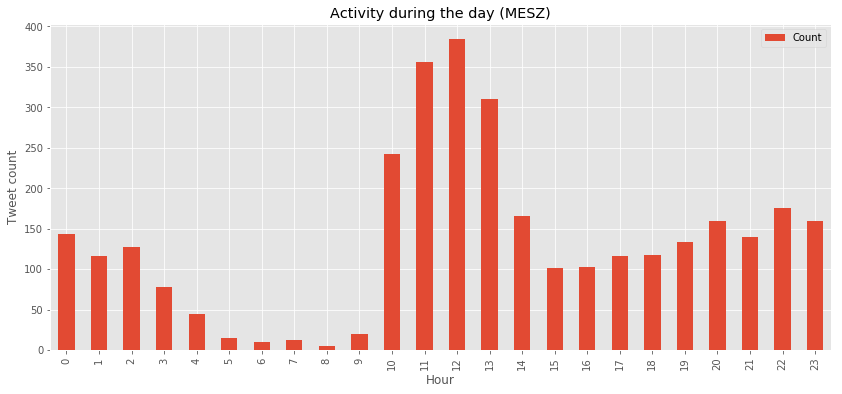

In [15]:
# Evaluate the activity over the day

# Group the Tweets by their hour
df_time = df['created_at'].groupby(pd.DatetimeIndex(df.created_at).hour).count().to_frame().rename(columns={'created_at':'Count'})

# Add inactive hours
for time in [i for i in range(0, 24)]:
    if time not in df_time.index.tolist():
        df_time.loc[time] = 0
# Sort the indices
df_time = df_time.sort_index()

df_time.plot(kind='bar', figsize=(14,6))
plt.title('Activity during the day (MESZ)')
plt.xlabel('Hour')
plt.ylabel('Tweet count')
plt.show()
plt.savefig('build/Account_Activity_per_Hour_{}.pdf'.format(name))

In [16]:
def plotBokeh(df):
    from bokeh.plotting import figure, show, ColumnDataSource, output_file
    from bokeh.models import PanTool, ResetTool, SaveTool, WheelZoomTool, HoverTool

    # Set the labels
    title = 'Word similarities in the Tweets of {}'.format(name)
    xlabel = 'x axis'
    ylabel = 'y axis'

    output_file('build/Word_Similarities_{}.html'.format(name))

    # Create the internal data-structure
    source = ColumnDataSource(data=dict(
        x=df['x'],
        y=df['y'],
        text=df['label']
    ))

    # Load useful tools
    pan = PanTool()
    reset = ResetTool()
    save = SaveTool()
    zoom = WheelZoomTool()
    
    #hover = HoverTool(tooltips=[("Word", "@text")])

    # Create the figure and plot the circles
    p = figure(plot_width=900, plot_height=600, tools=[pan, reset, save, zoom], active_scroll=zoom, title=title, toolbar_location="above")
    p.text('x', 'y', 'text', source=source)

    # Refine the layout
    p.xaxis.axis_label = xlabel
    p.yaxis.axis_label = ylabel

    show(p)

In [17]:
def cleanTweet(tweet):
    return tweet.lower().replace('.', '').replace(',', '').replace('-', '').replace(';', '').replace(':', '').replace("'", '').replace('@', '').replace('!', '').replace('?', '').replace('"', '')

In [18]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [19]:
stop = stopwords.words('english')

num = 5


words = {}
for tweet in df['text'].values:
    tweet = cleanTweet(tweet)
    for word in tweet.split():
        word = stemmer.stem(word)
        if len(word)>1 and not word.startswith('http'):
            if word not in words.keys():
                words[word] = 0
            else:
                words[word] += 1
            
words = {word for word, count in words.items() if count>num and word not in stop and word not in ['-', '&amp;']}
print(len(words))

loc_dict = {word:i for i, word in enumerate(words)}

dim = len(loc_dict)
matrix = np.zeros(shape=(dim, dim))

n = 9
for tweet in df['text'].values:
    tweet = cleanTweet(tweet)
    fivegrams = ngrams(tweet.split(), n)
    for grams in fivegrams:
        try:
            if grams[4] in loc_dict.keys():
                middle = loc_dict[stemmer.stem(grams[4])]
        
                for i in [0, 1, 2, 3, 5, 6, 7, 8]:
                    try:
                        word = stemmer.stem(grams[i])
                        matrix[middle][loc_dict[word]] += 1
                    except:
                        pass
        except:
            pass

1009


/home/jm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: generator 'ngrams' raised StopIteration


In [20]:
# Compute the principle components and plot the first two components
la = np.linalg
U, s, Vh = la.svd(matrix, full_matrices=False)

df_pca = pd.DataFrame(U[:, :2], columns=['x', 'y'])
df_pca['label'] = list(words)

In [21]:
plotBokeh(df_pca)

/home/jm/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/jm/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/jm/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1009 samples in 0.081s...
[t-SNE] Computed neighbors for 1009 samples in 5.678s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1009
[t-SNE] Computed conditional probabilities for sample 1009 / 1009
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.064667
[t-SNE] Error after 2150 iterations: 1.433518
t-SNE done! Time elapsed: 128.57872366905212 seconds


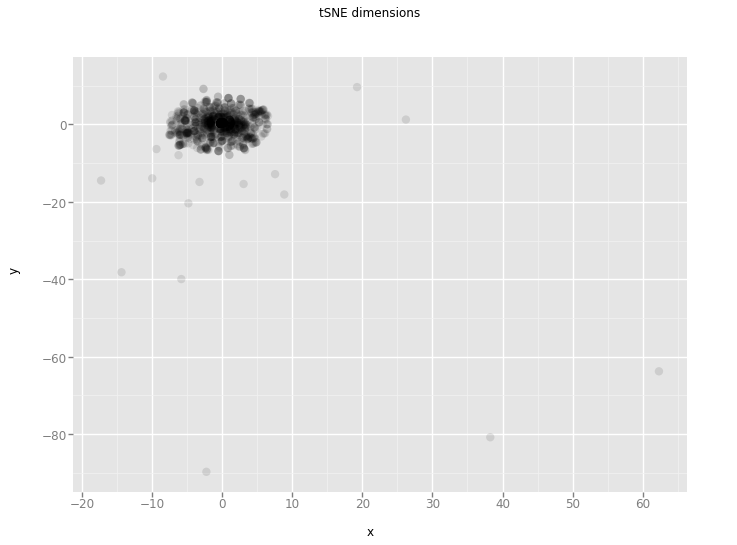

<ggplot: (8778602145835)>

In [22]:
# Compute t-sne for the words
import time

from sklearn.manifold import TSNE

import pandas as pd
from ggplot import *

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results = tsne.fit_transform(matrix)


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_tsne = pd.DataFrame(list(words), columns=['label'])
df_tsne['x'] = tsne_results[:,0]
df_tsne['y'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x', y='y') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions")
chart

In [23]:
plotBokeh(df_tsne)

# Word2Vec

In [24]:
from gensim.models import Word2Vec

tweets = []
for tweet in df['text']:
    tweets.append(tweet.lower().split())

account = Word2Vec(tweets, iter=50, min_count=10, workers=3)

wv = account.wv
word = list(wv.vocab.keys())
vec = [wv[key] for key in  word]




import time
from sklearn.manifold import TSNE
import pandas as pd
from ggplot import *

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(vec)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_tsne = pd.DataFrame(list(word), columns=['label'])
df_tsne['x'] = tsne_results[:,0]
df_tsne['y'] = tsne_results[:,1]

plotBokeh(df_tsne)

Using TensorFlow backend.


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.006s...
[t-SNE] Computed neighbors for 768 samples in 0.294s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 1.410091
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.637146
[t-SNE] Error after 500 iterations: 1.423076
t-SNE done! Time elapsed: 22.313941717147827 seconds


In [25]:
account.most_similar('fake', topn=10)

[('nbc', 0.6542447209358215),
 ('dishonest', 0.6468626856803894),
 ('#fakenews', 0.6431631445884705),
 ('cnn', 0.6360810399055481),
 ('coverage', 0.6272792816162109),
 ('report', 0.6094658374786377),
 ('fox', 0.6083208918571472),
 ('reporting', 0.5992912650108337),
 ('media', 0.5834277272224426),
 ('phony', 0.5522425770759583)]